# Mask R-CNN Background Removal

In [0]:
%tensorflow_version 1.x

import cv2
import os
import sys
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mg
# from base64 import b64encode
# from json import dumps

ROOT_DIR = os.path.abspath("/content/drive/My Drive/uzh/RL 4 marketing/Mask_RCNN/")
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import visualize
import mrcnn.model as modellib

# Load the pre-trained model data
from samples.ebay import ebay

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
DETECT_RESULTS_DIR = os.path.join(ROOT_DIR,"detect_results")

# ENCODING = 'utf-8'

## Configurations

In [0]:
class InferenceConfig(ebay.ObjectConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

## Notebook Preferences

In [0]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

In [0]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [0]:
# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Load the pre-trained model weights
# Get path to saved weights
# Either set a specific path or find last trained weights
EBAY_MODEL_PATH = os.path.join(MODEL_DIR, "object/mask_rcnn_object_0010.h5")
print("Loading weights...")
model.load_weights(EBAY_MODEL_PATH, by_name=True)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights...


In [0]:
class_names = ['backpacks', 'mouse', 'phone', 'laptop', 'books', 'bottles', 'cups']

## Run Detection

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  230.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  124.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32



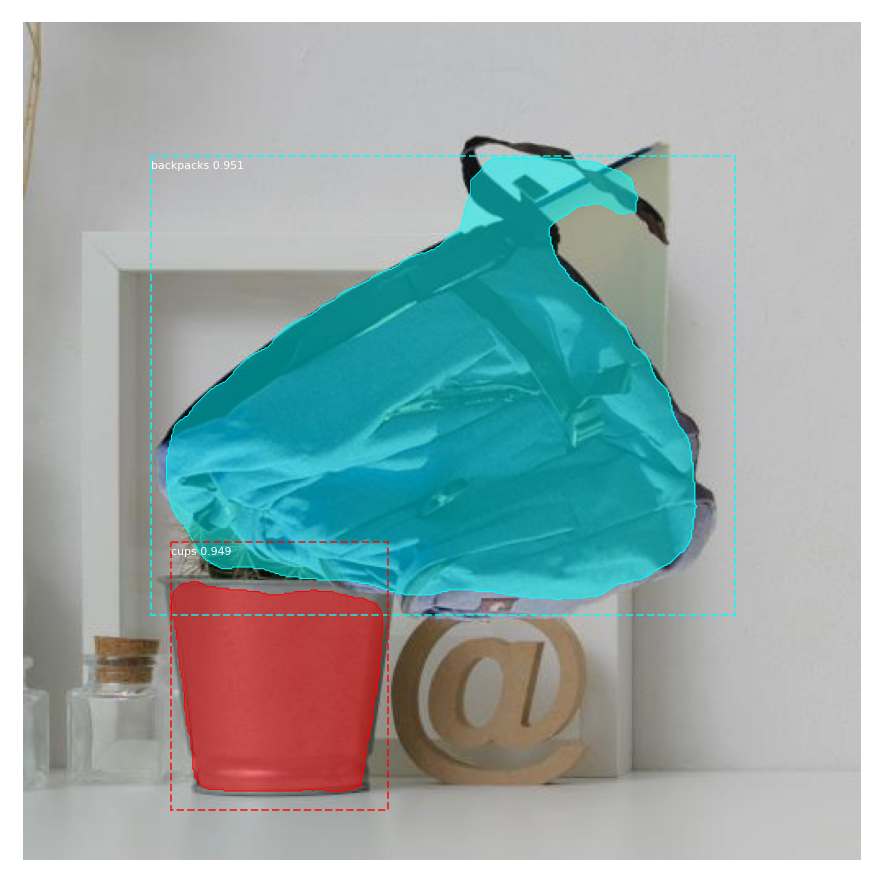

In [0]:
# Directory of images to run detection on
IMAGE_DIR = os.path.abspath("/content/drive/My Drive/uzh/RL 4 marketing/ebay_dataset_1/test/images")
# image_name = sys.argv[1]
# image = skimage.io.imread(os.path.join(IMAGE_DIR,image_name))

# # Load a random image from the images folder
# file_names = next(os.walk(IMAGE_DIR))[2]
# image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

image = skimage.io.imread(os.path.join(IMAGE_DIR, "00000006.jpg"))
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids']-1, 
                            class_names, r['scores'])

## Background Removal


In [0]:
def segment(image, r):
  idx = r['scores'].argmax()
  mask = r['masks'][:,:,idx]
  mask = np.stack((mask,)*3, axis=-1)
  mask = mask.astype('uint8')
  bg = 255 - mask * 255
  mask_img = image*mask
  result = mask_img+ bg
  return result

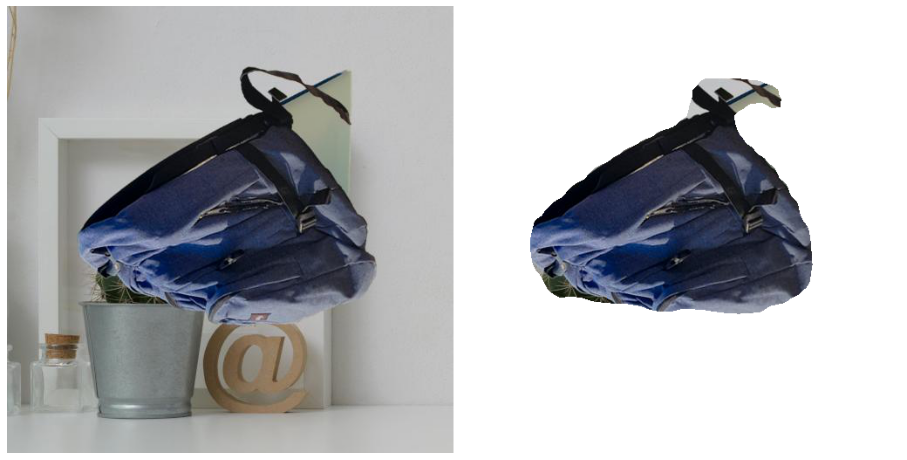

In [0]:
segmentation = segment(image, r)
plt.subplots(1, figsize=(16, 16))
plt.axis('off')
plt.imshow(np.concatenate([image, segmentation], axis = 1))

In [0]:
# def save_json_result(file_name, class_name):     
#     with open(file_name,'rb') as jpg_file:
#         byte_content = jpg_file.read()
#     base64_bytes = b64encode(byte_content)
#     base64_string = base64_bytes.decode(ENCODING)
#     raw_data = {}
#     raw_data["image_base64_string"] =  base64_string
#     raw_data['class_name'] = class_name
#     json_data = dumps(raw_data, indent=2)

#     JSON_NAME = os.path.join(DETECT_RESULTS_DIR,image_name + '.json')
#     with open(JSON_NAME,'w') as json_file:
#         json_file.write(json_data)
#         json_file.close()
#     print('Save json successfully!')

In [0]:
# save_path = os.path.join(DETECT_RESULTS_DIR, image_name)
save_path = os.path.join(DETECT_RESULTS_DIR, 'image_name.png')

mg.imsave(save_path, segmentation)
print('Save image successfully!')

# classid = r['class_ids']-1
# save_json_result(save_path , class_names[classid[0]])  

Save image successfully!
